# Credit Risk Assessment

The dataset is obtained from Kaggle, and I have used Sarah Beshr's article on Towards Data Science as a reference.

In [1]:
# Read the dataset
data = read.csv("credit_risk_dataset.csv")

In [2]:
# View total observations
NROW(data)

[1] 32581

In [3]:
# View the head of the dataset 
head(data)

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


In [4]:
# View the summary of the dataset
summary(data)

   person_age     person_income     person_home_ownership person_emp_length
 Min.   : 20.00   Min.   :   4000   MORTGAGE:13444        Min.   :  0.00   
 1st Qu.: 23.00   1st Qu.:  38500   OTHER   :  107        1st Qu.:  2.00   
 Median : 26.00   Median :  55000   OWN     : 2584        Median :  4.00   
 Mean   : 27.73   Mean   :  66075   RENT    :16446        Mean   :  4.79   
 3rd Qu.: 30.00   3rd Qu.:  79200                         3rd Qu.:  7.00   
 Max.   :144.00   Max.   :6000000                         Max.   :123.00   
                                                          NA's   :895      
            loan_intent   loan_grade   loan_amnt     loan_int_rate  
 DEBTCONSOLIDATION:5212   A:10777    Min.   :  500   Min.   : 5.42  
 EDUCATION        :6453   B:10451    1st Qu.: 5000   1st Qu.: 7.90  
 HOMEIMPROVEMENT  :3605   C: 6458    Median : 8000   Median :10.99  
 MEDICAL          :6071   D: 3626    Mean   : 9589   Mean   :11.01  
 PERSONAL         :5521   E:  964    3rd Qu.:12

The dataset has 12 features for 32,581 borrowers identified in the dataset. The variables are described as follows:
1. person_age: Quantitative variable for age of the borrower in years
2. person_income: Quantitative variable for annual income of the borrower in USD
3. person_home_ownership: Categorical variable for home ownership status - morgage, own, rent, and other
4. person_emp_length: Quantitative variable for length of employment in years
5. loan_intent: Categorical variable for reason for loan - debt consolidation, education, home improvement, medical, personal, and venture
6. loan_grade: Categorical variable for loan grade - A through G
7. loan_amt: Quantitative variable for amount of loan in USD
8. loan_int_rate: Quantitative variable for loan interest rate in percentage
9. loan_status: Dummy variable - 1 for default, 0 for no default
10. loan_percent_income: Quantitative variable for loan as a percent of income
11. cb_person_default_on_file: Dummy variable for default history
12. cb_person_cred_hist_length: Quantitative variable for the length of credit history in years

Among the above listed variables, I am interested in predicting the loan_status of the borrowers, so that will be the response variable through my analysis.
I will next pre-process the dataset.

In [5]:
str(data)

'data.frame':	32581 obs. of  12 variables:
 $ person_age                : int  22 21 25 23 24 21 26 24 24 21 ...
 $ person_income             : int  59000 9600 9600 65500 54400 9900 77100 78956 83000 10000 ...
 $ person_home_ownership     : Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 3 1 4 4 3 4 4 4 3 ...
 $ person_emp_length         : num  123 5 1 4 8 2 8 5 8 6 ...
 $ loan_intent               : Factor w/ 6 levels "DEBTCONSOLIDATION",..: 5 2 4 4 4 6 2 4 5 6 ...
 $ loan_grade                : Factor w/ 7 levels "A","B","C","D",..: 4 2 3 3 3 1 2 2 1 4 ...
 $ loan_amnt                 : int  35000 1000 5500 35000 35000 2500 35000 35000 35000 1600 ...
 $ loan_int_rate             : num  16 11.1 12.9 15.2 14.3 ...
 $ loan_status               : int  1 0 1 1 1 1 1 1 1 1 ...
 $ loan_percent_income       : num  0.59 0.1 0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 ...
 $ cb_person_default_on_file : Factor w/ 2 levels "N","Y": 2 1 1 1 2 1 1 1 1 1 ...
 $ cb_person_cred_hist_length: int  3 2 3 2 4 2 

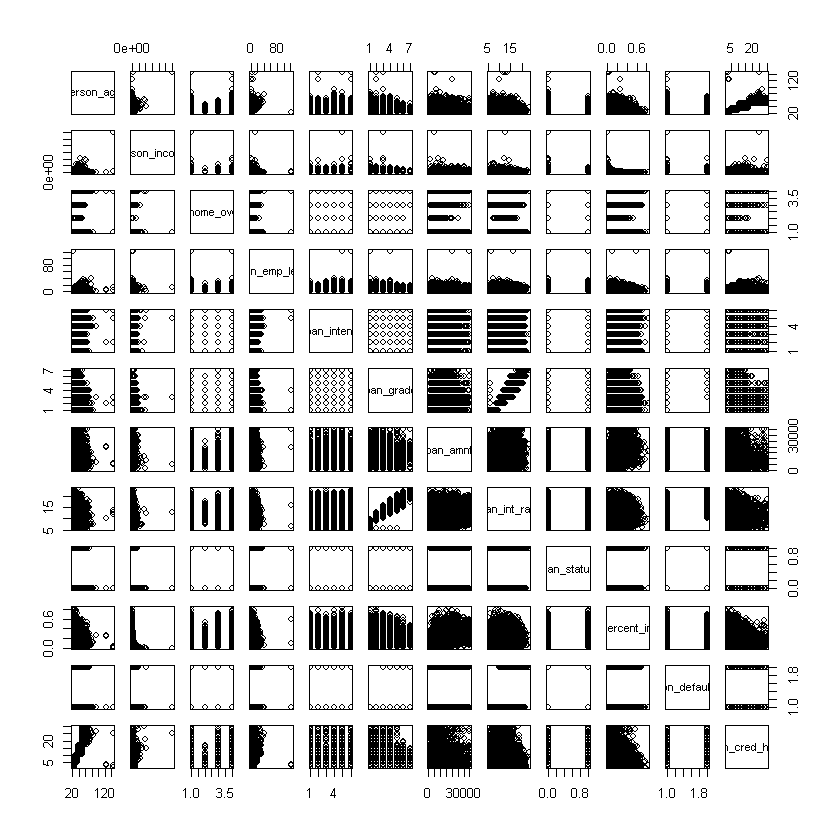

In [6]:
plot(data)

In [6]:
# Find the columns with missing values
lapply(data,function(x) { length(which(is.na(x)))})

$person_age
[1] 0

$person_income
[1] 0

$person_home_ownership
[1] 0

$person_emp_length
[1] 895

$loan_intent
[1] 0

$loan_grade
[1] 0

$loan_amnt
[1] 0

$loan_int_rate
[1] 3116

$loan_status
[1] 0

$loan_percent_income
[1] 0

$cb_person_default_on_file
[1] 0

$cb_person_cred_hist_length
[1] 0

In [7]:
# Remove rows with no observations
data <- na.omit(data)
NROW(data)

[1] 28638

In [8]:
# Remove outliers
data <- data[data$person_age <= 100,]
data <- data[data$person_income <= 4000000,]
data <- data[data$person_emp_length <= 100,]

In [9]:
summary(data)

   person_age    person_income     person_home_ownership person_emp_length
 Min.   :20.00   Min.   :   4000   MORTGAGE:11798        Min.   : 0.00    
 1st Qu.:23.00   1st Qu.:  39456   OTHER   :   94        1st Qu.: 2.00    
 Median :26.00   Median :  55900   OWN     : 2192        Median : 4.00    
 Mean   :27.71   Mean   :  66427   RENT    :14548        Mean   : 4.78    
 3rd Qu.:30.00   3rd Qu.:  80000                         3rd Qu.: 7.00    
 Max.   :84.00   Max.   :2039784                         Max.   :41.00    
                                                                          
            loan_intent   loan_grade   loan_amnt     loan_int_rate  
 DEBTCONSOLIDATION:4565   A:9401     Min.   :  500   Min.   : 5.42  
 EDUCATION        :5702   B:9149     1st Qu.: 5000   1st Qu.: 7.90  
 HOMEIMPROVEMENT  :3198   C:5697     Median : 8000   Median :10.99  
 MEDICAL          :5293   D:3247     Mean   : 9655   Mean   :11.04  
 PERSONAL         :4875   E: 870     3rd Qu.:12500   3r

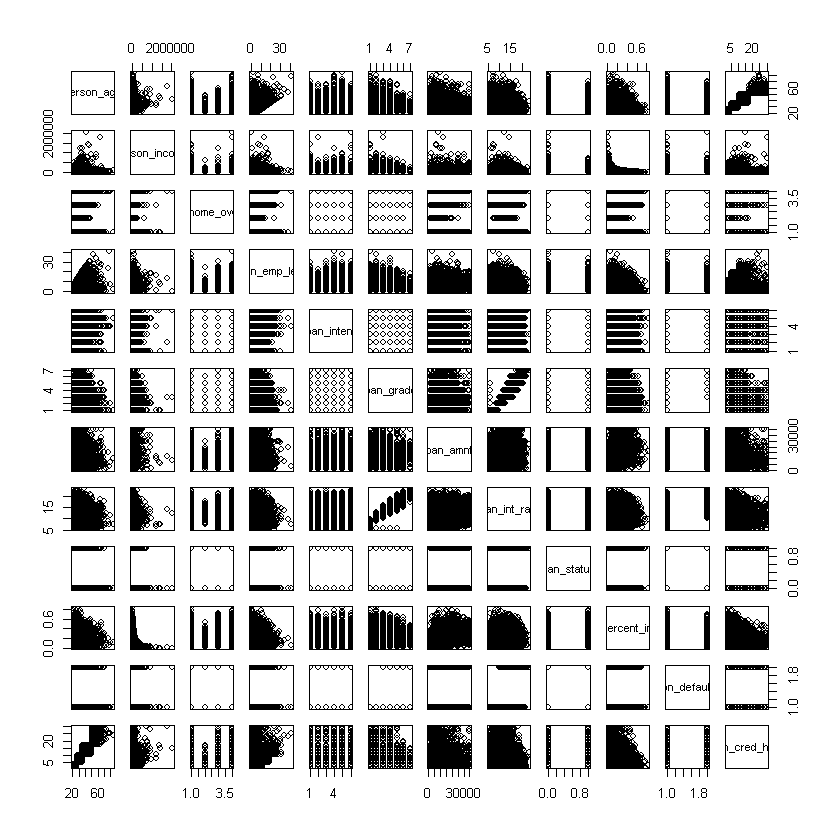

In [11]:
plot(data)

The logit model explains 35.8% of the variability. Loan_status is explained as a combination of the following variables: age, income, home ownership status, loan intent, loan grade, loan amount, loan interest rate, and loan percent income. I see that historical default statuses and credit length aren't significant.

In [10]:
# Spliting data into training and test sets
set.seed(6)
train=sample(1:nrow(data),nrow(data)/2)
test=-train
training_data=data[train,]
testing_data=data[test,]

I will apply classification methods on training sets, and check the prediction accuracy on the test sets.

In [11]:
# Logistic Regression
set.seed(8)
logit.fit <- glm(loan_status~., data = training_data, family=binomial)
logit.pred <-  predict(logit.fit, testing_data, type="response")
mean((logit.pred - testing_data$loan_status)^2)

[1] 0.09972684

In [12]:
# Calculate R-squared of the logit model
r2Log <- function(model) {
  summaryLog <- summary(logit.fit)
  1 - summaryLog$deviance / summaryLog$null.deviance
}
r2Log(logit.fit)

[1] 0.3483419

The error rate yielded by the logistic regression is 9.97%. The logit model explains 34.83% of total variation in the response.

In [13]:
# VIF
library(car)
vif(logit.fit)

Loading required package: carData


,GVIF,Df,GVIF^(1/(2*Df))
person_age,4.313480,1,2.076892
person_income,1.549668,1,1.244857
person_home_ownership,1.184225,3,1.028582
person_emp_length,1.083823,1,1.041068
loan_intent,1.083541,5,1.008056
loan_grade,12.808077,6,1.236774
loan_amnt,2.486671,1,1.576918
loan_int_rate,9.781644,1,3.127562
loan_percent_income,2.480857,1,1.575074
cb_person_default_on_file,1.542492,1,1.241971


The variables overall seem to pass the collinearity test. The variables loan_grade and loan_int_rate demand special attention.

In [14]:
# Logistic Regression on a reduced model
set.seed(14)
logit.fit1 <- glm(loan_status~person_age+person_income+person_home_ownership+person_emp_length+ 
loan_intent+loan_amnt+loan_percent_income,data = training_data, family=binomial)
logit.pred1 <-  predict(logit.fit1, testing_data, type="response")
mean((logit.pred1 - testing_data$loan_status)^2)

[1] 0.1272796

Dropping the insignificant and variables with VIF close to or greater than 10 increases the error rate of the logit model, so I will keep the full model for further analysis.

In [23]:
# KNN
options(message=-1)
options(warn=-1)
library("caret")
set.seed(44)
trControl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
fit.1 <- train(loan_status~.,data = training_data, method = 'knn', tuneLength = 20,
       trControl = trControl,preProc = c("center", "scale"))
pred.1 <- predict(fit.1, newdata = testing_data)
mean((pred.1 - testing_data$loan_status)^2)

[1] 0.08871287

The error rate yielded by KNN is 8.87%.

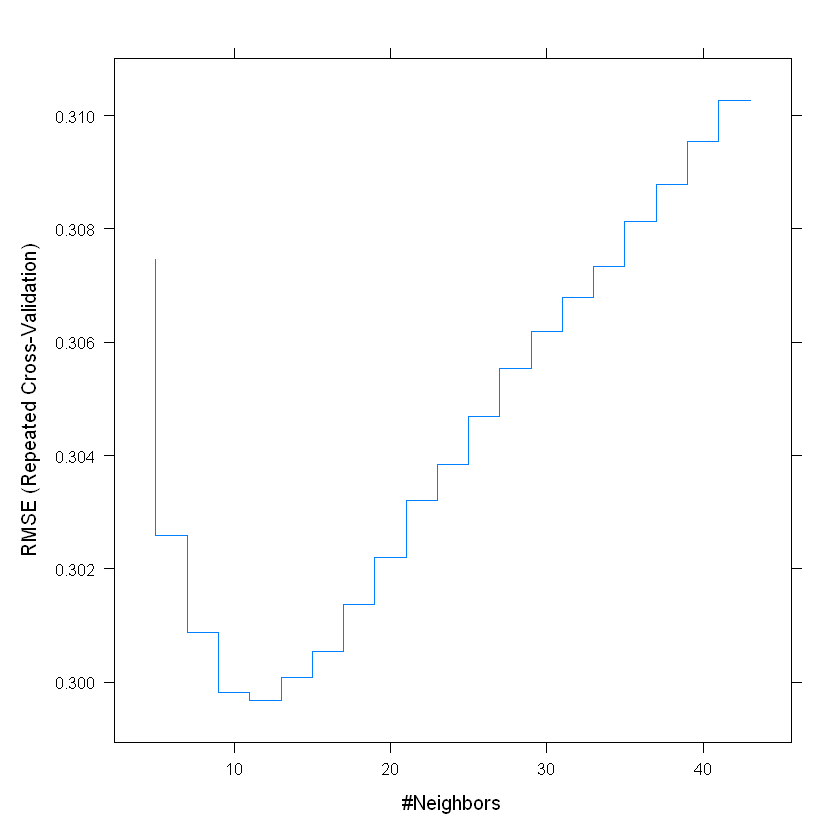

In [18]:
plot(fit.1, print.thres = 0.5, type="S")

In [23]:
# LDA
library(MASS)
lda.fit <- lda(loan_status∼., data=training_data)
lda.pred <- predict(lda.fit, testing_data)$class
mean(lda.pred != testing_data$loan_status)

[1] 0.1342554

The error rate yielded by linear discriminant analysis is 13.43%.